In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding' 
import seaborn as sns

# 전체 데이터 정보

In [2]:
df = pd.read_csv('./Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [3]:
# 전체 데이터 정보확인. 3가지 수입정보에서 NaN값이 많이 보인다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
# 데이터 타입을 계산하기 편하게 int와 float으로 변경하면서 결제여부도 숫자로 변경한다. 
df['has_paid'][df['has_paid']==True] = 1
df['has_paid'][df['has_paid']==False] = 0
df['has_paid']=df['has_paid'].astype('int64')
df['age']=df['age'].astype('int64')

df.info()

In [4]:
# 전체 데이터 통계. 전체적으로 편차가 심해 평균의 데이터는 유용하지 않다.
# 단, 나이는 어린 사용자가 많아 보이고,
# 결제를 한 사람과 안한 사람의 비율은 약 2:1 정도 된다.
df.describe().iloc[1:]

,age,year,refund,fee,income_근로,income_사업,income_기타
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


# 1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?

# 데이터 전처리 과정
결제여부와의 영향이기 때문에 모든 컬럼을 has_paid 컬럼과 비교해본다.

**1. 나이와 결제여부 (age - has_paid)**  
나이는 10살 간격으로 끊었고, 컬럼명은 나이의 앞자리 수로 표시했다. (추후 변경 필요)

Text(0.5, 1.0, '나이별 별 결제비율(%)')

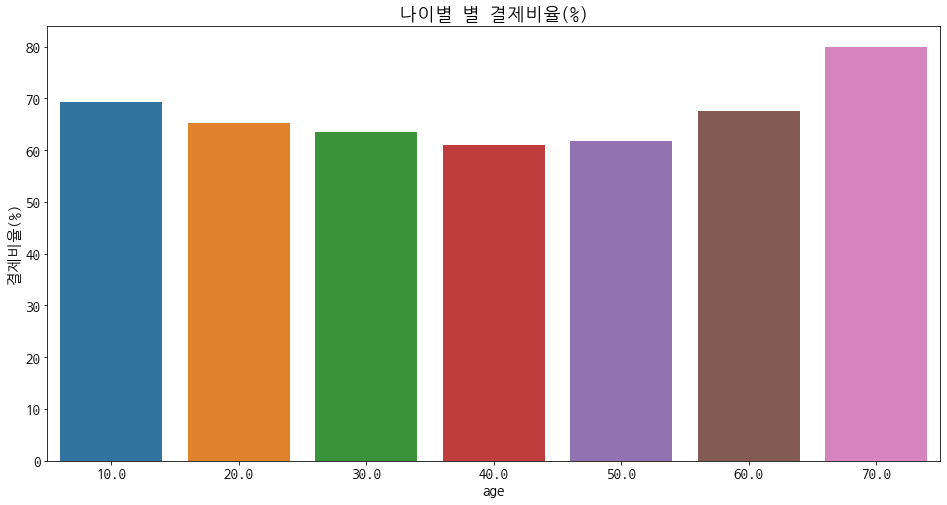

In [5]:
age_df = df.copy()

age_df['age'][age_df['age']<20] = 10
age_df['age'][(age_df['age']<30) & (age_df['age']>=20)] = 20
age_df['age'][(age_df['age']<40) & (age_df['age']>=30)] = 30
age_df['age'][(age_df['age']<50) & (age_df['age']>=40)] = 40
age_df['age'][(age_df['age']<60) & (age_df['age']>=50)] = 50
age_df['age'][(age_df['age']<70) & (age_df['age']>=60)] = 60
age_df['age'][age_df['age']>70] = 70

age_df = pd.crosstab(age_df['age'], age_df['has_paid'])
age_df['합'] = age_df[0] + age_df[1]
age_df['결제비율(%)'] = round(age_df[1] / age_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=age_df, x=age_df.index, y='결제비율(%)')
plt.title('나이별 별 결제비율(%)')

- 모든 나이에서 결제를 한 비율이 대부분 60~70%정도 된다.
- 나이별로 결제여부를 확인하는 것은 유의미하지 않다.

**2. 성별과 결제여부 (gender - has_paid)**

Text(0.5, 1.0, '성별 별 결제비율(%)')

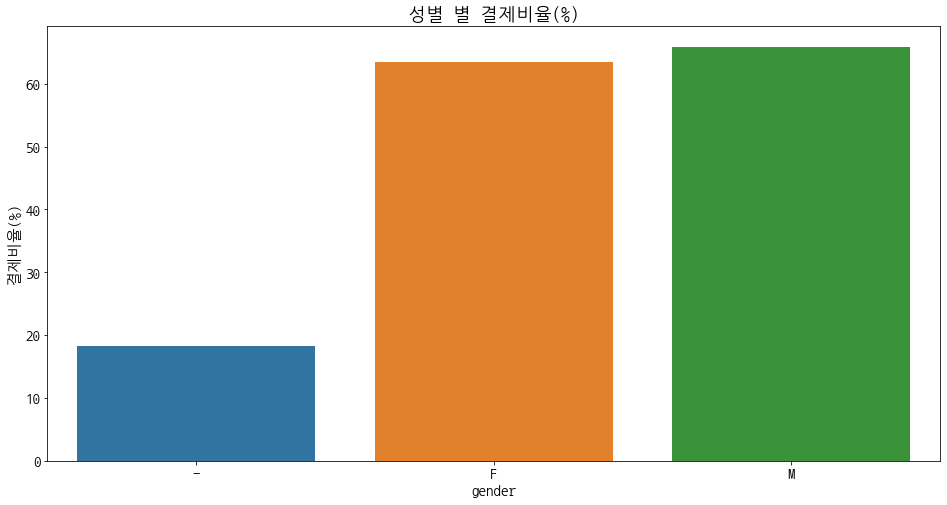

In [8]:
gender_df = df.copy()
gender_df = pd.crosstab(gender_df['gender'], gender_df['has_paid'])
gender_df['합'] = gender_df[0] + gender_df[1]
gender_df['결제비율(%)'] = round(gender_df[1] / gender_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=gender_df, x=gender_df.index, y='결제비율(%)')
plt.title('성별 별 결제비율(%)')

- 잘못된 값 (-)이 들어가 있다. 추후에 삭제 필요
- 성별 또한 결제비율이 비슷하므로 성별로 확인하는 것은 유의미하지 않다.

**3. 연도와 결제여부 (year - has_paid)**

Text(0.5, 1.0, '연도별 별 결제비율(%)')

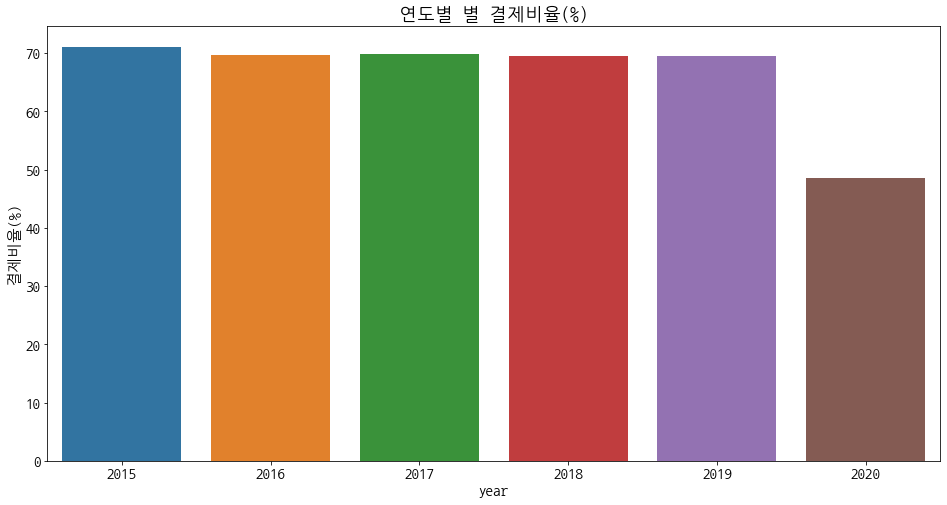

In [10]:
year_df = df.copy()
year_df = pd.crosstab(year_df['year'], year_df['has_paid'])
year_df['합'] = year_df[0] + year_df[1]
year_df['결제비율(%)'] = round(year_df[1] / year_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=year_df, x=year_df.index, y='결제비율(%)')
plt.title('연도별 별 결제비율(%)')

- 2015년 부터 매해 70%정도의 사용자가 결제를 했지만 2020년에 결제비율이 50% 이하로 급감했다.

**4. 환급금액과 결제여부 (refund - has_paid)**  
환급금액의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '환급금액 별 결제비율(%)')

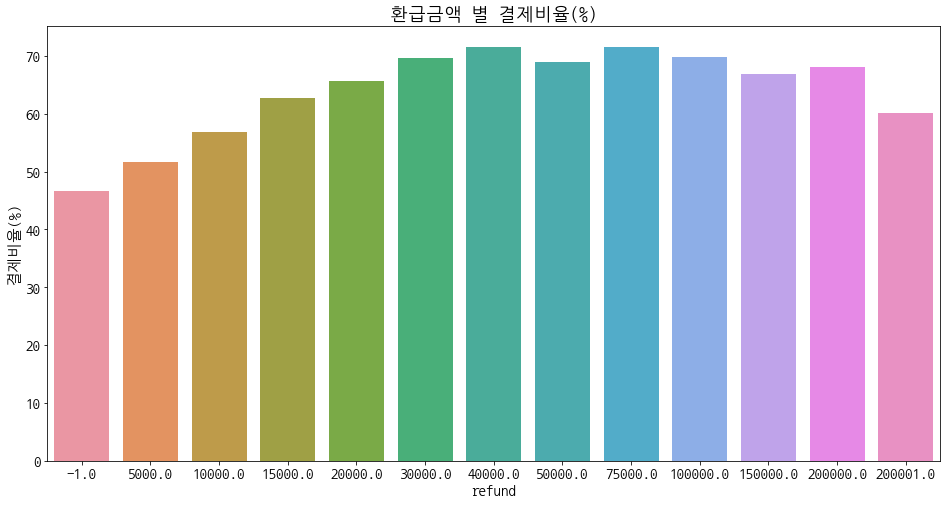

In [11]:
# 환급금액은 높아질수록 결제비율이 높아진다.
refund_df = df.copy()

refund_df['refund'][refund_df['refund']<0] = -1
refund_df['refund'][(refund_df['refund']<=5000) & (refund_df['refund']>=0)] = 5000
refund_df['refund'][(refund_df['refund']<=10000) & (refund_df['refund']>5000)] = 10000
refund_df['refund'][(refund_df['refund']<=15000) & (refund_df['refund']>10000)] = 15000
refund_df['refund'][(refund_df['refund']<=20000) & (refund_df['refund']>15000)] = 20000
refund_df['refund'][(refund_df['refund']<=30000) & (refund_df['refund']>20000)] = 30000
refund_df['refund'][(refund_df['refund']<=40000) & (refund_df['refund']>30000)] = 40000
refund_df['refund'][(refund_df['refund']<=50000) & (refund_df['refund']>40000)] = 50000
refund_df['refund'][(refund_df['refund']<=75000) & (refund_df['refund']>50000)] = 75000
refund_df['refund'][(refund_df['refund']<=100000) & (refund_df['refund']>75000)] = 100000
refund_df['refund'][(refund_df['refund']<=150000) & (refund_df['refund']>100000)] = 150000
refund_df['refund'][(refund_df['refund']<=200000) & (refund_df['refund']>150000)] = 200000
refund_df['refund'][(refund_df['refund']>200000)] = 200001

refund_df = pd.crosstab(refund_df['refund'], refund_df['has_paid'])
refund_df['합'] = refund_df[0] + refund_df[1]
refund_df['결제비율(%)'] = round(refund_df[1] / refund_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=refund_df, x=refund_df.index, y='결제비율(%)')
plt.title('환급금액 별 결제비율(%)')

- 환급금액이 올라갈수록 결제비율이 높아지다가 4만원을 기점으로 더이상 상승하지 않고 일정 수준을 유지한다.
- 환급금액은 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**5. 수수료와 결제여부 (fee - has_paid)**  
수수료의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '수수료 별 결제비율(%)')

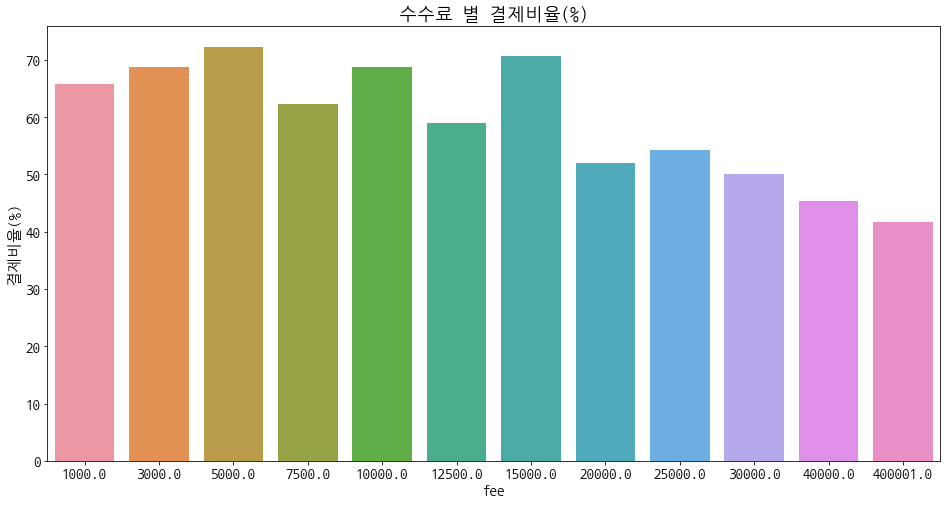

In [12]:
# 수수료는 높아질수록 결제 비율이 낮아졌다.
fee_df = df.copy()

fee_df['fee'][fee_df['fee']<=1000] = 1000
fee_df['fee'][(fee_df['fee']<=3000) & (fee_df['fee']>1000)] = 3000
fee_df['fee'][(fee_df['fee']<=5000) & (fee_df['fee']>3000)] = 5000
fee_df['fee'][(fee_df['fee']<=7500) & (fee_df['fee']>5000)] = 7500
fee_df['fee'][(fee_df['fee']<=10000) & (fee_df['fee']>7500)] = 10000
fee_df['fee'][(fee_df['fee']<=12500) & (fee_df['fee']>10000)] = 12500
fee_df['fee'][(fee_df['fee']<=15000) & (fee_df['fee']>12500)] = 15000
fee_df['fee'][(fee_df['fee']<=20000) & (fee_df['fee']>15000)] = 20000
fee_df['fee'][(fee_df['fee']<=25000) & (fee_df['fee']>20000)] = 25000
fee_df['fee'][(fee_df['fee']<=30000) & (fee_df['fee']>25000)] = 30000
fee_df['fee'][(fee_df['fee']<=40000) & (fee_df['fee']>30000)] = 40000
fee_df['fee'][(fee_df['fee']>40000)] = 400001

fee_df = pd.crosstab(fee_df['fee'], fee_df['has_paid'])
fee_df['합'] = fee_df[0] + fee_df[1]
fee_df['결제비율(%)'] = round(fee_df[1] / fee_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=fee_df, x=fee_df.index, y='결제비율(%)')
plt.title('수수료 별 결제비율(%)')

- 수수료가 올라가도 결제비율이 일정 수준을 유지하다가 1.5만원을 기점으로 그 이상의 수수료에서 급격하게 하락한다.
- 수수료는 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**6. 근로소득과 결제여부 (income_근로 - has_paid)**  
근로소득의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '근로소득 별 결제비율(%)')

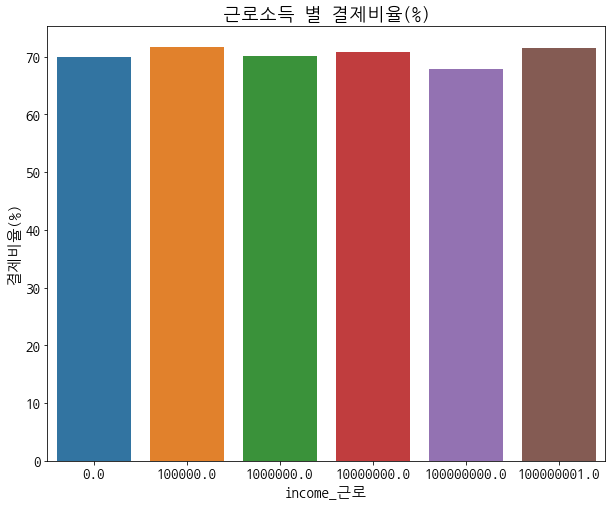

In [18]:
incomeW_df = df.copy()

incomeW_df['income_근로'][(incomeW_df['income_근로']<=100000) & (incomeW_df['income_근로']>0)] = 100000
incomeW_df['income_근로'][(incomeW_df['income_근로']<=1000000) & (incomeW_df['income_근로']>100000)] = 1000000
incomeW_df['income_근로'][(incomeW_df['income_근로']<=10000000) & (incomeW_df['income_근로']>1000000)] = 10000000
incomeW_df['income_근로'][(incomeW_df['income_근로']<=100000000) & (incomeW_df['income_근로']>10000000)] = 100000000
incomeW_df['income_근로'][(incomeW_df['income_근로']>100000000)] = 100000001

incomeW_df = pd.crosstab(incomeW_df['income_근로'], incomeW_df['has_paid'])

incomeW_df['합'] = incomeW_df[0] + incomeW_df[1]
incomeW_df['결제비율(%)'] = round(incomeW_df[1] / incomeW_df['합'],3) * 100
incomeW_df

plt.figure(figsize=(10,8))
sns.barplot(data=incomeW_df, x=incomeW_df.index, y='결제비율(%)')
plt.title('근로소득 별 결제비율(%)')

- 근로소득으로 분류했을 때는 모든 분류에서 70%정도 결제비율을 기록하고 있다.
- 근로소득은 결제여부와 관련이 없다고 할 수 있다.

**7. 사업소득과 결제여부 (income_사업 - has_paid)**  
사업소득의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '사업소득 별 결제비율(%)')

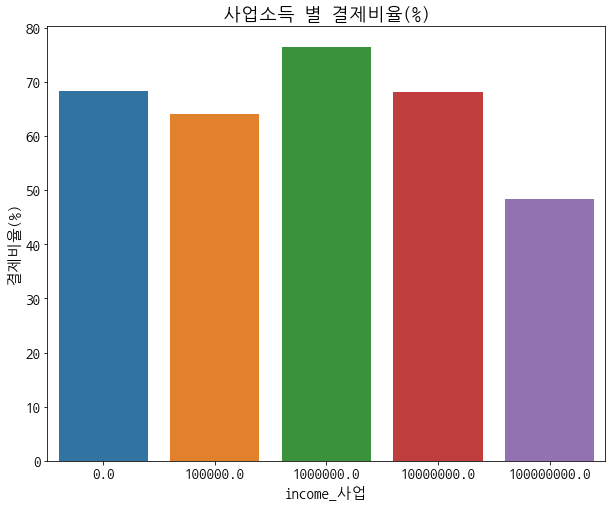

In [20]:
incomeB_df = df.copy()

incomeB_df['income_사업'][(incomeB_df['income_사업']<=100000) & (incomeB_df['income_사업']>0)] = 100000
incomeB_df['income_사업'][(incomeB_df['income_사업']<=1000000) & (incomeB_df['income_사업']>100000)] = 1000000
incomeB_df['income_사업'][(incomeB_df['income_사업']<=10000000) & (incomeB_df['income_사업']>1000000)] = 10000000
incomeB_df['income_사업'][(incomeB_df['income_사업']<=100000000) & (incomeB_df['income_사업']>10000000)] = 100000000
incomeB_df['income_사업'][(incomeB_df['income_사업']>100000000)] = 100000001

incomeB_df = pd.crosstab(incomeB_df['income_사업'], incomeB_df['has_paid'])

incomeB_df['합'] = incomeB_df[0] + incomeB_df[1]
incomeB_df['결제비율(%)'] = round(incomeB_df[1] / incomeB_df['합'],3) * 100

plt.figure(figsize=(10,8))
sns.barplot(data=incomeB_df, x=incomeB_df.index, y='결제비율(%)')
plt.title('사업소득 별 결제비율(%)')

- 사업소득이 올라가도 결제비율이 일정 수준을 유지하다가 100만원을 기점으로 그 이상에서 급격하게 하락한다.
- 사업소득과 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**8. 기타소득과 결제여부 (income_기타 - has_paid)**  
수수료의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '기타소득 별 결제비율(%)')

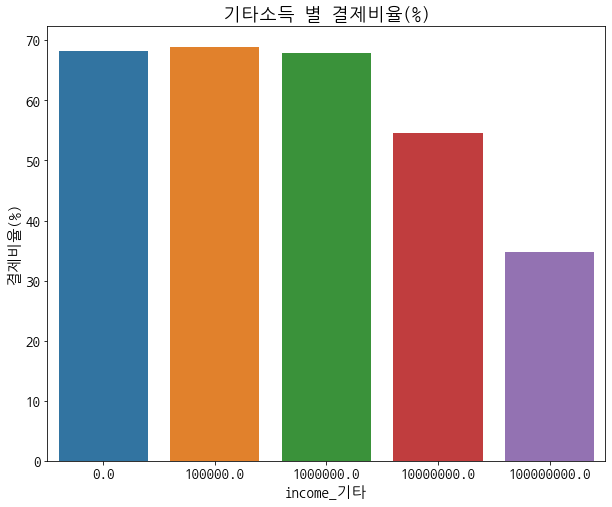

In [19]:
incomeE_df = df.copy()

incomeE_df['income_기타'][(incomeE_df['income_기타']<=100000) & (incomeE_df['income_기타']>0)] = 100000
incomeE_df['income_기타'][(incomeE_df['income_기타']<=1000000) & (incomeE_df['income_기타']>100000)] = 1000000
incomeE_df['income_기타'][(incomeE_df['income_기타']<=10000000) & (incomeE_df['income_기타']>1000000)] = 10000000
incomeE_df['income_기타'][(incomeE_df['income_기타']<=100000000) & (incomeE_df['income_기타']>10000000)] = 100000000
incomeE_df['income_기타'][(incomeE_df['income_기타']>100000000)] = 100000001

incomeE_df = pd.crosstab(incomeE_df['income_기타'], incomeE_df['has_paid'])
incomeE_df['합'] = incomeE_df[0] + incomeE_df[1]
incomeE_df['결제비율(%)'] = round(incomeE_df[1] / incomeE_df['합'],3) * 100

plt.figure(figsize=(10,8))
sns.barplot(data=incomeE_df, x=incomeE_df.index, y='결제비율(%)')
plt.title('기타소득 별 결제비율(%)')

- 기타소득이 올라가도 결제비율이 일정 수준을 유지하다가 10만원을 기점으로 그 이상에서 급격하게 하락한다.
- 기타소득은 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**9. 연도별 데이터 확인**  
위 차트중 2020년에서 결제비율이 급감한 것을 확인했었다. 따라서 2020년의 데이터가 다른 해와 무엇이 다른지 확인해본다.

In [22]:
df.groupby('year').mean()

,age,refund,fee,has_paid,income_근로,income_사업,income_기타
year,,,,,,,
2015,30.748808,162656.210790,4396.461731,0.710665,7.185168e+06,1.190697e+06,353550.135501
2016,30.553511,171084.237763,5579.752749,0.697046,5.564348e+06,1.184565e+06,631957.721139
2017,29.636296,176735.467276,5852.214919,0.697571,5.580112e+06,1.234388e+06,626396.768829
2018,28.836261,179430.415853,5994.825602,0.694991,6.436469e+06,1.246838e+06,590564.809496
2019,28.228049,173935.226946,5831.383744,0.694799,7.005829e+06,1.174407e+06,510586.325095
2020,28.148179,314651.459087,12021.541502,0.485241,6.814694e+06,2.362054e+06,802807.476067


- 위 8개의 차트 자료중 수수료, 사업소득, 기타소득이 올라갈 때 결제 비율이 떨어지는 것을 확인했었다.
- 그런데 2020년은 다른해에 비해 환급금액, 수수료, 사업소득, 기타소득이 늘어났다.
- 특히 그 중에서도 수수료, 사업소득이 많이 늘어났다.

# 정리
위 자료를 확인해봤을때 가장 연관성이 있는것은 수수료라고 본다.  
나에게 주어지는 이익보다 당장의 손실을 더 크게 생각하는 인간의 심리상 수수료가 일정 금액에서 비싸지면 결제하기를 꺼려하지 않았을까 생각해본다.

# 2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야할까?

먼저 수수료(fee)와 상관관계가 높은 컬럼을 찾아보자

Text(0.5, 1.0, '특징들간의 Correlation')

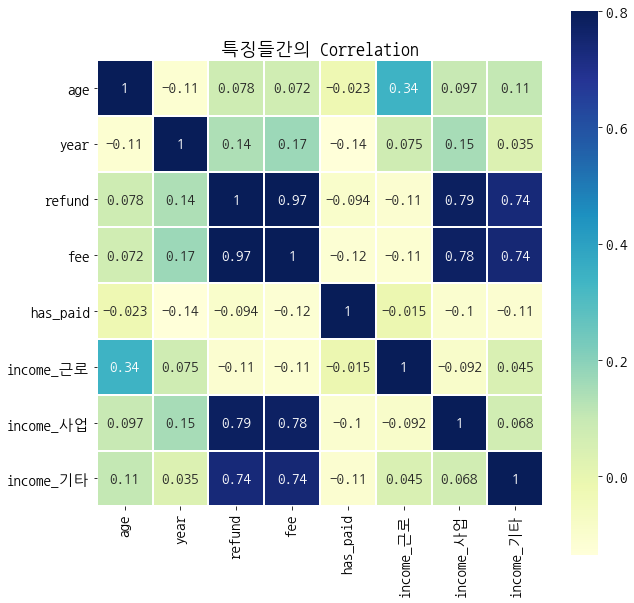

In [23]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu');
plt.title('특징들간의 Correlation')

- 환급금액과 수수료는 굉장히 높은 상관관계를 형성하고 있다.
- 또 이 두가지는 사업소득과 기타소득 두가지와 높은 상관관계를 형성하고 있다.

# 정리
사업소득과 기타소득이 높은 고객이 환급금액이 높을 것이고 수수료도 높을 것이다.  
따라서 사업소득과 기타소득이 많은 고객에게 혜택을 부여하는 방법도 좋을것같다.(추후 내용 추가 필요)